In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

df = pd.read_csv('NYC_Restaurants.csv', dtype=str, index_col=0)
df.head(1)

Populating the interactive namespace from numpy and matplotlib


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection


#### Q1

In [2]:
#new column with spaces in between
df['RESTAURANT'] = df['DBA'] + " " + df['BUILDING'] + " " + df['STREET'] + " " + df['ZIPCODE'] + " " + df['BORO']

#prints the last column of the table and the first 10 rows
print(df['RESTAURANT'][:10])

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


#### Q2

In [3]:
restaurant_count = df['RESTAURANT'].value_counts()
len(restaurant_count)

10114

#### Q3

In [4]:
# extract DBA and RESTAURANT and combine them
DBA_restaurant = df[['DBA','RESTAURANT']]
# drop duplicate records for each restaurant
DBA = DBA_restaurant.drop_duplicates(subset='RESTAURANT')
# count the addresses for each DBA 
DBA_count = DBA['DBA'].value_counts()
# filter the chains
chain = DBA_count[DBA_count > 1]
len(chain)

368

#### Q4

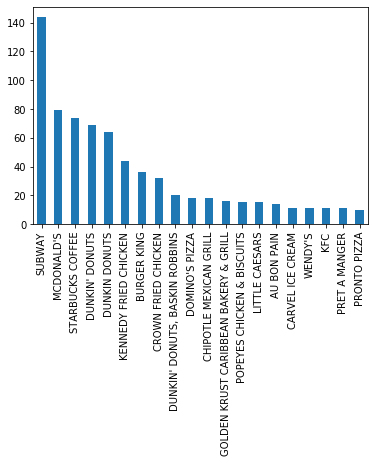

In [5]:
chain[:20].plot(kind='bar')

#### Q5 the number of chain restaurants divided by total number of restaurants

In [6]:
# Out of all brand, % of brand that are chain 
# fraction = len(chain) / len(DBA_count) 
# fraction

# Out of all resturant, % of resturant that is chain-resturant
chain.sum()/DBA_count.sum()

0.16472216729286138

#### Q6

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


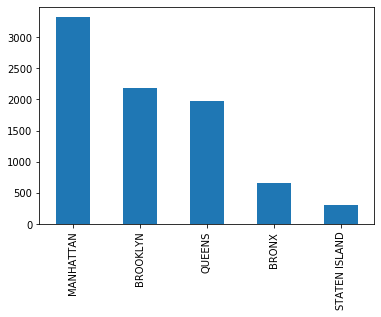

In [7]:
# drop duplicates from the new combined df
DBA_BORO_RESTAURANT = df[['DBA','BORO','RESTAURANT']].drop_duplicates(subset='RESTAURANT')
# figure out all non-chain restaurants
non_chain_count = DBA_count[DBA_count == 1]
non_chain = DBA_BORO_RESTAURANT[DBA_BORO_RESTAURANT['DBA'].isin(non_chain_count.index)]
# set missing values to NaN so that they are not counted.
mask = (non_chain['BORO'] == 'Missing')
non_chain.loc[mask, 'BORO'] = np.nan 
# plot non-chain restaurants in each boro
non_chain['BORO'].value_counts().plot(kind='bar')

#### Q7

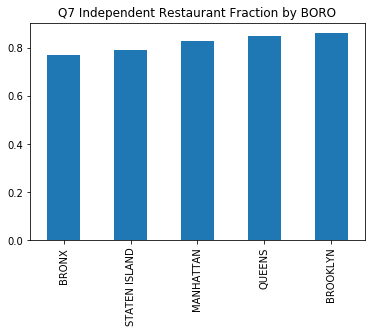

The boro with the most independent restaurants is NOT the one with the highest ratio of independent restaurants.


In [24]:
# Retrive two value_count() series, and divide them for ploting.
nonChainCountByBORO = non_chain['BORO'].value_counts()
allResturantCountByBORO = DBA_BORO_RESTAURANT['BORO'].value_counts()

# receive divided value in new series
nonChainFractionByBORO = nonChainCountByBORO.divide(allResturantCountByBORO)
# plot 
nonChainFractionByBORO.sort_values().drop(labels='Missing').plot(kind='bar',title='Q7 Independent Restaurant Fraction by BORO')
plt.show()
# 'BROOKLYN has the highest ratio of independent restaurants.'
print("The boro with the most independent restaurants is NOT the one with the highest ratio of independent restaurants.")


#### Q8

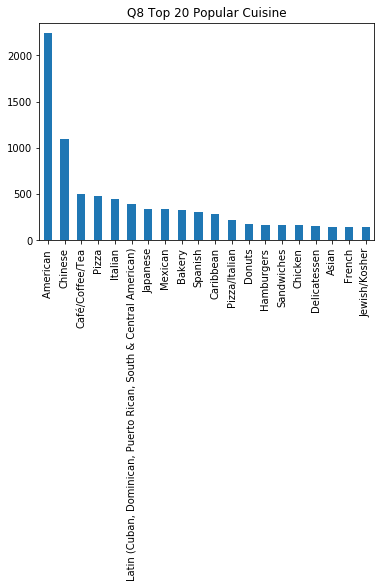

In [9]:
resturant_cuisine = df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates('RESTAURANT')

resturantCuisineCount = resturant_cuisine['CUISINE DESCRIPTION'].value_counts()
# plot the top 20 popular cuisine
resturantCuisineCount[:20].plot(kind='bar', title='Q8 Top 20 Popular Cuisine')

#### Q9

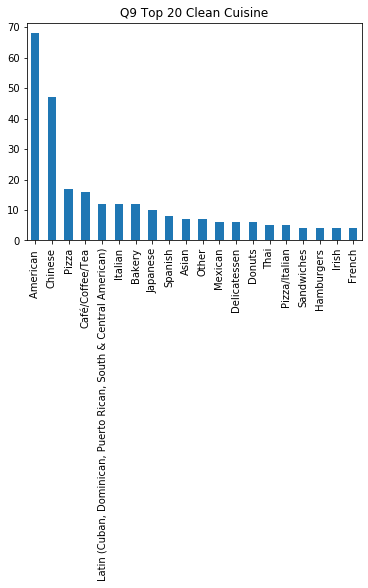

In [10]:
resturant_cusine_violation = df[['VIOLATION CODE','CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates('RESTAURANT')
# find all restaurant that passed inspection
q9Mask = resturant_cusine_violation['VIOLATION CODE'].isnull()
q9_nonViolationRest = resturant_cusine_violation[q9Mask]
# Plot the healthy cuisine
non_violation_resturant = q9_nonViolationRest['CUISINE DESCRIPTION'].value_counts()
non_violation_resturant[:20].plot(kind='bar', title='Q9 Top 20 Clean Cuisine')

#### Q10

In [11]:
popular_cuisine_resturants = resturantCuisineCount[resturantCuisineCount>20]
ratio_clean_resturant_by_cuisine = non_violation_resturant / popular_cuisine_resturants
ratio_clean_resturant_by_cuisine.dropna().sort_values(ascending=False)[:10]

Vietnamese/Cambodian/Malaysia    0.093750
Soul Food                        0.090909
Other                            0.067961
Irish                            0.057143
Asian                            0.047945
Soups & Sandwiches               0.047619
Barbecue                         0.047619
Continental                      0.047619
Chinese                          0.042805
Delicatessen                     0.039216
Name: CUISINE DESCRIPTION, dtype: float64

#### Q11

In [12]:
violations_boro = df[['VIOLATION DESCRIPTION', 'BORO']]
cross_tbl = pd.crosstab(violations_boro['BORO'],violations_boro['VIOLATION DESCRIPTION'])
cross_tbl.idxmax(axis=1).drop(labels='Missing')

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

#### Q12

In [13]:
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()
cross_tbl.divide(violationFrequency).idxmax(axis=1).drop(labels='Missing')

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

#### Q13

In [17]:
#first 3 digits of phone number
df['AREACODE'] = df['PHONE'].str[:3]
#combine with zipcode
area_zip = df[['AREACODE', 'ZIPCODE']].drop_duplicates()
# Each area code, count its zipcode
areacode_zipcount = area_zip.groupby('AREACODE').count().reset_index()
mask = (areacode_zipcount['ZIPCODE']==1)
# show the number of arecode that exists in only one zipcode
len(areacode_zipcount[mask])

34

#### Q14

In [22]:
#create street type column 
df['STREET TYPE'] = df['STREET'].str.split().str[-1]
#create street base column
street_base = df['STREET'].str.split().str[:-1]
def join_str(x):
    return(' '.join(x))
df['STREET BASE'] = street_base.map(join_str)
#create street base & zip column 
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']
#create table containing these three columns , and clean duplicate
df['STREET BASE'].replace('', np.nan, inplace=True)
df.dropna(subset = ['STREET BASE'], inplace=True)
street_zip = df[['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']]
street_zip_clean = street_zip.drop_duplicates()

#merge table with itself 
merge_street_zip = street_zip_clean.merge(street_zip_clean,
                                         left_on ='STREET BASE & ZIP',
                                         right_on = 'STREET BASE & ZIP',
                                          suffixes=['_one', '_two'])
merge_street_zip[:5]


,STREET TYPE_one,STREET BASE_one,STREET BASE & ZIP,STREET TYPE_two,STREET BASE_two
0,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
1,AVENUE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
2,AVE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
3,AVE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
4,ROAD,63,63 11374,ROAD,63


In [23]:
#rows where street types are different 
mask = merge_street_zip['STREET TYPE_one'] != merge_street_zip['STREET TYPE_two']
mask_street = merge_street_zip[mask]
mask_street[:5]

,STREET TYPE_one,STREET BASE_one,STREET BASE & ZIP,STREET TYPE_two,STREET BASE_two
1,AVENUE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
2,AVE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
5,ROAD,63,63 11374,DRIVE,63
6,DRIVE,63,63 11374,ROAD,63
12,AVENUE,CHURCH,CHURCH 11218,AVE,CHURCH


In [17]:
#cross-tab of distinct street types 
street_crstbl = pd.crosstab(mask_street['STREET TYPE_one'], mask_street['STREET TYPE_two'])
street_crstbl[:20]

STREET TYPE_two,A,AAVENUE,AIRPOR,AIRPORT,AVE,AVENUE,AVEUE,B,BLVD,BOULEARD,...,SW,TERMINAL,TPKE,TURNPIKE,U,V,W,WEST,X,Z
STREET TYPE_one,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
AAVENUE,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPOR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPORT,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVE,0,1,0,0,0,163,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVENUE,0,1,0,0,163,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVEUE,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BLVD,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#most commonly used street type
print(street_crstbl['AVE'].idxmax())
print(street_crstbl['ST'].idxmax())
print(street_crstbl['RD'].idxmax())
print(street_crstbl['PL'].idxmax())
print(street_crstbl['BOULEARD'].idxmax())
print(street_crstbl['BULEVARD'].idxmax())

AVENUE
STREET
ROAD
PLACE
BLVD
BLVD
